
1. Thêm các thư viện cần sử dụng


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Mounted at /content/drive


2. Khai báo các biến cần sử dụng

In [ ]:
# kích thước của mỗi ảnh
img_height = img_width = 1.5

# số lượng ảnh trên một hàng
imgs_per_row = 10

# đường dẫn đến thư mục chính
root_dir = r"/content/drive/MyDrive/MyPublic"

# đường dẫn đến thư mục chứa ảnh
img_dir = r"/content/drive/MyDrive/Public"

# tên file chứa đường dẫn các mẫu
dataset_csv = "CarDataset.csv"

# danh sách các hãng xe
car_brands = tuple([
  'Others',
  'Honda',
  'Suzuki',
  'Hyundai',
  'VinFast',
  'KIA',
  'Mazda',
  'Mitsubishi',
  'Toyota'
])

3. Hàm khởi tạo subplot

In [ ]:
def plot_init(imgs_per_row: int, img_height: int, img_width: int, categories: tuple):
  w_ratios = [1.5] + [1 for _ in range(imgs_per_row)]
  gap = 0.1
  plot_width = img_width * sum(w_ratios) + gap * (len(w_ratios) - 1)
  plot_height = img_height * len(categories) + gap * (len(categories) - 1)

  return plt.subplots(
      nrows=len(categories),
      ncols=imgs_per_row + 1,
      figsize=(plot_width, plot_height),
      gridspec_kw={
          'width_ratios': w_ratios,
          'wspace' : gap,
          'hspace' : gap
      }
  )

4. Hàm hiển thị hình ảnh của 10 xe ngẫu nhiên theo từng phân loại

In [ ]:
def visualize_cars_by_category(car_df: pd.DataFrame, imgs_per_row: int, img_height: int, img_width: int):
  grouped_df = car_df.groupby("CategoryID")
  [_, axes] = plot_init(imgs_per_row, img_height, img_width, car_brands)

  for category_id in range(len(car_brands)):
    row_label = car_brands[category_id]
    axes[category_id, 0].text(
        0.5, 0.5, row_label,
        ha='center', va='center',
        fontsize=img_height * 15, fontweight='bold'
    )
    axes[category_id, 0].set_axis_off()

    img_paths = grouped_df.get_group(category_id)["Path"].tolist();
    random_paths = random.sample(img_paths, imgs_per_row)

    for i in range(imgs_per_row):
      img_full_path = os.path.join(img_dir, random_paths[i])
      car_img = Image.open(img_full_path)
      axes[category_id, i + 1].imshow(car_img)
      axes[category_id, i + 1].set_axis_off()
  plt.show()

5. Chương trình chính

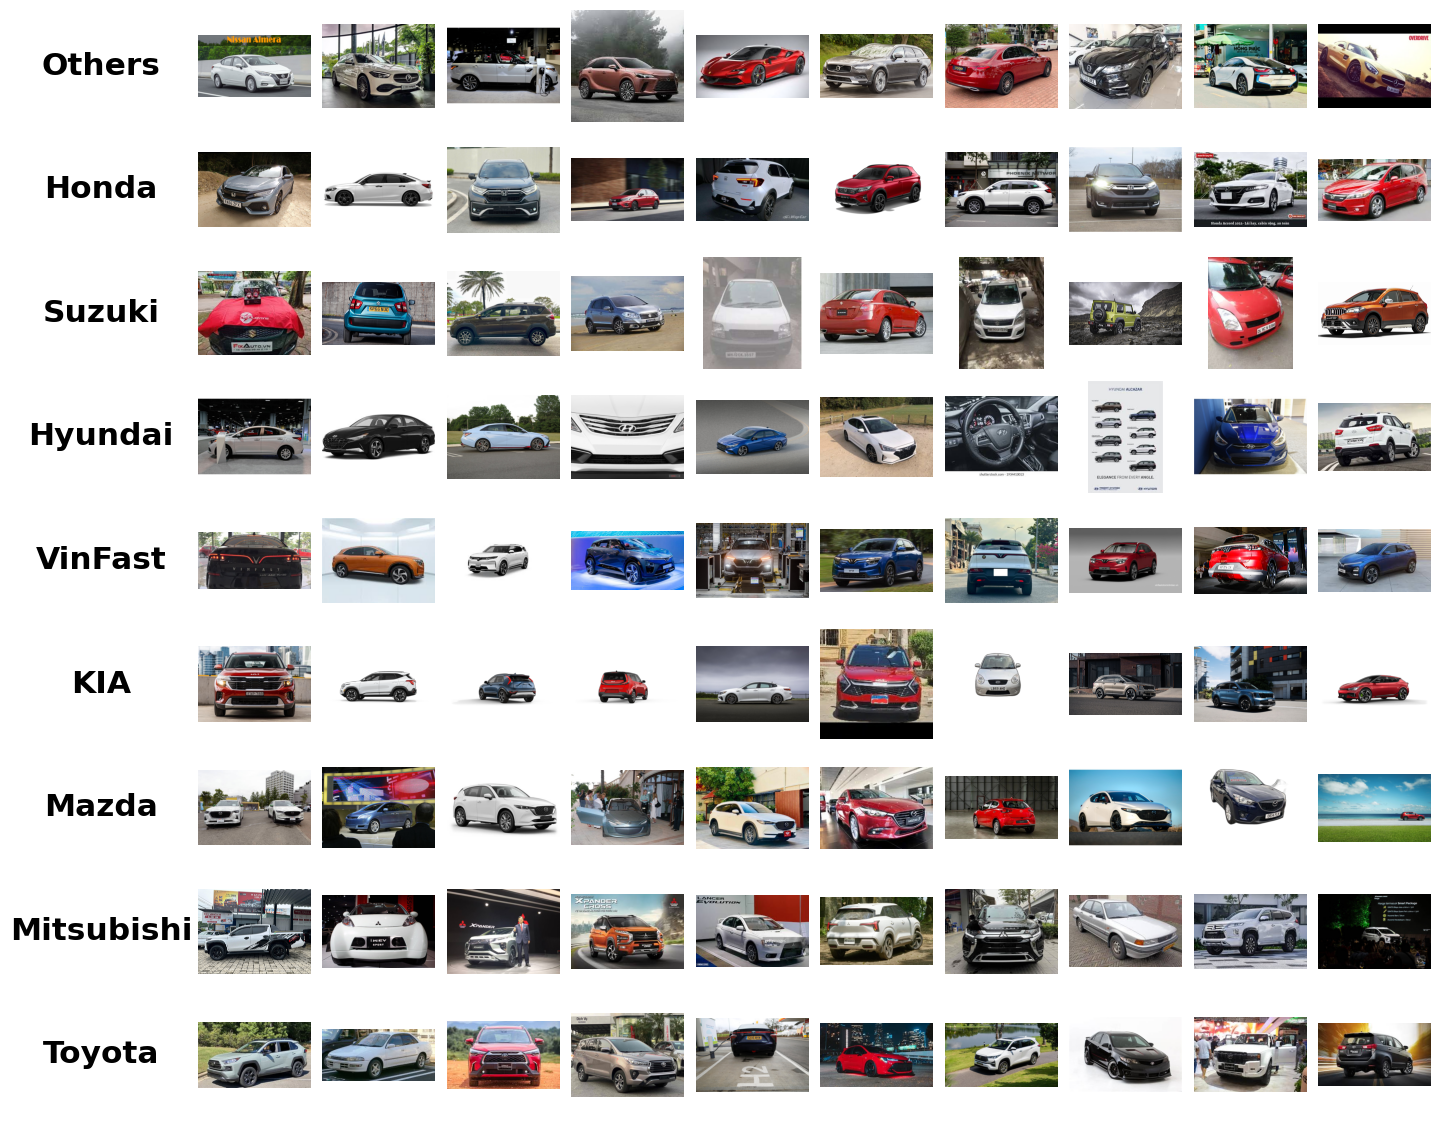

In [ ]:
dataset_path = os.path.join(root_dir, dataset_csv)
cars_df = pd.read_csv(dataset_path)
cars_df.columns = ["Path", "CategoryID"]
visualize_cars_by_category(cars_df, imgs_per_row, img_height, img_width)